In [ ]:
import math   
import csv
import numpy as np 
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
import IPython
import pandas as pd
import os
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import IPython.display as ipd
from scipy.signal import freqz

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#music file, Fs
song_sample, sampling_freq = sf.read('/content/gdrive/My Drive/sinyal/P_9_2c.wav')

In [ ]:
audio = []
label = []
file_audio = []
path = '/content/gdrive/MyDrive/dataset/'

audio_df = pd.DataFrame()
for files in os.listdir(path):
  path2 = os.path.join(path, files)
  audio_names = files.split(".")[0]
  audio_label = files.split("_")[1]
  audio_files = files

  audio.append(audio_names)
  label.append(audio_label)
  file_audio.append(audio_files)

audio_df['audio_names']=audio
audio_df['audio_label']=label
audio_df['file_audio']=file_audio
audio_df

,audio_names,audio_label,file_audio
0,New_AS_001,AS,New_AS_001.wav
1,New_AS_002,AS,New_AS_002.wav
2,New_AS_003,AS,New_AS_003.wav
3,New_AS_004,AS,New_AS_004.wav
4,New_AS_005,AS,New_AS_005.wav
...,...,...,...
995,New_AS_198,AS,New_AS_198.wav
996,New_AS_199,AS,New_AS_199.wav
997,New_AS_200,AS,New_AS_200.wav
998,New_MVP_199,MVP,New_MVP_199.wav


In [ ]:
def signal(path, audio_df):
  signal_ori = []
  for idx, rows in audio_df.iterrows():
    path2 = os.path.join(path, rows.file_audio)
    signal, sampling_freq = sf.read(path2)    # Read audio
    signal = np.interp(signal, (signal.min(), signal.max()), (-1, 1))    # norm audio to (1, -1)
    signal_ori.append(signal)

  signal_ori = np.array(signal_ori)
  print(signal_ori.shape)
  return signal_ori

path = '/content/gdrive/MyDrive/dataset/'
signal_ori = signal(path, audio_df)

(1000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [ ]:
!mkdir audio_denoising_file

In [ ]:
#hasil denoise dalam bentuk wav
def denoise(path, audio_df):
  #denoising = []
  for idx, rows in audio_df.iterrows():
    path2 = os.path.join(path, rows.file_audio)
    signal, sampling_freq = sf.read(path2)     # Read audio
    signal = np.interp(signal, (signal.min(), signal.max()), (-1, 1))    # norm audio to (1, -1)

    #low pass filter
    #L
    filter_len = 101
    #Fc origigal 7500, kita coba 1000, 2000, dsb
    low_cutoff_freq = 2000

    zero_index = [0]

    #Ft
    normalized_transition_freq_low = low_cutoff_freq/sampling_freq
    #setting the initial weights filled with zeros in the array
    filter_coefficients = filter_len * zero_index
    #M
    filter_order = filter_len - 1

    two_pi = 2*np.pi

    i=0
    w_num=[]
    w_den = []

    #taking half of the M value
    half_filter = filter_order/2
    two_pi = 2*np.pi

    #low-pass filter algorithm
    two_norm_freq_low = 2*normalized_transition_freq_low
    for index in range(filter_len):
      if(index != half_filter):
        #dividing the numerator and denominator for the equation
        w_num = np.sin(two_pi*normalized_transition_freq_low*(index-half_filter))
        w_den = np.pi*(index-half_filter)
        filter_coefficients[index] = w_num/w_den
      else:
        filter_coefficients[index] = two_norm_freq_low

    #variable for hamming window values
    hamming_win_weights = zero_index * filter_len

    eq1 = 0.54
    coeff = 0.46

    for i in range(filter_len):
      h_num = two_pi*i
      h_cos = np.cos(h_num/filter_order)
      hamming_win_weights[i] = (eq1 - coeff*(h_cos))

    hamming_window1 = []

    windowed_output = zero_index * filter_len
    for i in range(filter_len):
      windowed_output[i] = filter_coefficients[i] * hamming_win_weights[i]

    hamming_window2 = []

    cleanFile = np.convolve(windowed_output,signal)

    temp = '/content/audio_denoising_file/'
    saving_path = os.path.join(temp, rows.file_audio)
    sf.write(saving_path, cleanFile, sampling_freq, 'PCM_16')

  #denoising = np.array(denoising)
  #print(denoising.shape)
  #return denoising

path = '/content/gdrive/MyDrive/dataset/'
denoise(path, audio_df)

In [ ]:
#hasil denoise dalam bentuk list/array
def list_denoise(path, audio_df):
  signal_denoise_list = []
  for idx, rows in audio_df.iterrows():
    path2 = os.path.join(path, rows.file_audio)
    signal, sampling_freq = sf.read(path2)     # Read audio    # Read audio
    signal = np.interp(signal, (signal.min(), signal.max()), (-1, 1))    # norm audio to (1, -1)
    signal_denoise_list.append(signal)

  signal_denoise_list = np.array(signal_denoise_list)
  print(signal_denoise_list.shape)
  return signal_denoise_list

path = '/content/audio_denoising_file/'
signal_denoise_list = signal(path, audio_df)

(1000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [ ]:
!apt-get install rar

In [ ]:
!rar a "/content/audio_denoising_file" "/content/audio_denoising_file"

In [ ]:
signal_ori[0].shape

(20849,)

In [ ]:
signal_denoise_list[0].shape

(20949,)

In [ ]:
tambahan = np.zeros(shape=(100))

In [ ]:
gabung = np.concatenate((signal_ori[0],tambahan))

In [ ]:
gabung.shape

(20949,)

In [ ]:
mse_list = []
rmse_list = []
pnsr_list = []

for i in range(0,1000):
  mse = mean_squared_error(gabung, signal_denoise_list[0])
  rmse = np.sqrt(mean_squared_error(gabung, signal_denoise_list[0]))
  pnsr = 20*np.log10(np.max(gabung)/np.sqrt(mse))

  mse_list.append(mse) 
  rmse_list.append(rmse)
  pnsr_list.append(pnsr)

print('MSE: {:.4f}'.format(np.mean(mse_list)))
print('RMSE: {:.4f}'.format(np.mean(rmse_list)))
print('PNSR: {:.4f}'.format(np.mean(pnsr_list)))

MSE: 0.1204
RMSE: 0.3469
PNSR: 9.1948


load list untuk di ekstraksi

In [ ]:
!ls "/content/gdrive/My Drive/sinyal3"

AS  MR	MS  MVP  N


In [ ]:
from glob import glob

#directories audio abnormal
data_AS = '/content/gdrive/My Drive/sinyal3/AS/'
audio_files_AS = glob(data_AS  + '*.wav')

data_MR = '/content/gdrive/My Drive/sinyal3/MR/'
audio_files_MR = glob(data_MR  + '*.wav')

data_MS = '/content/gdrive/My Drive/sinyal3/MS/'
audio_files_MS = glob(data_MS  + '*.wav')

data_MVP = '/content/gdrive/My Drive/sinyal3/MVP/'
audio_files_MVP = glob(data_MVP  + '*.wav')

#directories of normal audios
data_N = '/content/gdrive/My Drive/sinyal3/AS/'
audio_files_N = glob(data_N  + '*.wav')

print(f'Number of AS audios : {len(audio_files_AS)}')
print(f'Number of MR audios : {len(audio_files_MR)}')
print(f'Number of MS audios : {len(audio_files_MS)}')
print(f'Number of MVP audios : {len(audio_files_MVP)}')
print(f'Number of N audios : {len(audio_files_N)}')

Number of AS audios : 200
Number of MR audios : 200
Number of MS audios : 200
Number of MVP audios : 200
Number of N audios : 200


Load random audio file from Dataset

In [ ]:
pathAS="/content/gdrive/My Drive/sinyal3/AS/New_AS_001.wav"
pathMR="/content/gdrive/My Drive/sinyal3/MR/New_MR_001.wav"
pathMS="/content/gdrive/My Drive/sinyal3/MS/New_MS_001.wav"
pathMVP="/content/gdrive/My Drive/sinyal3/MVP/New_MVP_021.wav"
pathN="/content/gdrive/My Drive/sinyal3/N/New_N_035.wav"
sinyalAS, srAS=librosa.load(pathAS)
sinyalMR, srMR=librosa.load(pathMR)
sinyalMS, srMS=librosa.load(pathMS)
sinyalMVP, srMVP=librosa.load(pathMVP)
sinyalN, srN=librosa.load(pathN)
print(type(sinyalAS), type(srAS))
print(type(sinyalMR), type(srMR))
print(type(sinyalMS), type(srMS))
print(type(sinyalMVP), type(srMVP))
print(type(sinyalN), type(srN))

<class 'numpy.ndarray'> <class 'int'>
<class 'numpy.ndarray'> <class 'int'>
<class 'numpy.ndarray'> <class 'int'>
<class 'numpy.ndarray'> <class 'int'>
<class 'numpy.ndarray'> <class 'int'>


load use wave

In [ ]:
# Load use wave 
import wave
wav1 = wave.open(pathAS)
print("Signal Aortic valve Stenosis (AS)")
print("Sampling (frame) rate = ", wav1.getframerate())
print("Total samples (frames) = ", wav1.getnframes())
print("Duration = ", wav1.getnframes()/wav1.getframerate())
print("----------------------------------")
wav2 = wave.open(pathMR)
print("Signal Mitral valve Regurgitation (MR)")
print("Sampling (frame) rate = ", wav2.getframerate())
print("Total samples (frames) = ", wav2.getnframes())
print("Duration = ", wav2.getnframes()/wav2.getframerate())
print("----------------------------------")
wav3 = wave.open(pathMS)
print("Signal  Mitral valve Stenosis (MS)")
print("Sampling (frame) rate = ", wav3.getframerate())
print("Total samples (frames) = ", wav3.getnframes())
print("Duration = ", wav3.getnframes()/wav3.getframerate())
print("----------------------------------")
wav4 = wave.open(pathMVP)
print("Signal Murmur in systole (MVP)")
print("Sampling (frame) rate = ", wav4.getframerate())
print("Total samples (frames) = ", wav4.getnframes())
print("Duration = ", wav4.getnframes()/wav4.getframerate())
print("----------------------------------")
wav5 = wave.open(pathN)
print("Signal Normal (N)")
print("Sampling (frame) rate = ", wav5.getframerate())
print("Total samples (frames) = ", wav5.getnframes())
print("Duration = ", wav5.getnframes()/wav5.getframerate())

Signal Aortic valve Stenosis (AS)
Sampling (frame) rate =  8000
Total samples (frames) =  20949
Duration =  2.618625
----------------------------------
Signal Mitral valve Regurgitation (MR)
Sampling (frame) rate =  8000
Total samples (frames) =  16895
Duration =  2.111875
----------------------------------
Signal  Mitral valve Stenosis (MS)
Sampling (frame) rate =  8000
Total samples (frames) =  23726
Duration =  2.96575
----------------------------------
Signal Murmur in systole (MVP)
Sampling (frame) rate =  8000
Total samples (frames) =  20502
Duration =  2.56275
----------------------------------
Signal Normal (N)
Sampling (frame) rate =  8000
Total samples (frames) =  16834
Duration =  2.10425


Ekstraksi

In [ ]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=0051a0eb15ad0387868e15307f1e3bc2bf3696a3c686409009d583f95443ea72
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
#ekstrak MFCCs
from python_speech_features import mfcc

In [ ]:
mfccs = mfcc(sinyalAS, srAS)
print('\nMFCC:\nNumber of windows =', mfccs.shape[0])
print('Length of each feature =', mfccs.shape[1])


MFCC:
Number of windows = 260
Length of each feature = 13



Filter bank:
Number of windows = 260
Length of each feature = 26


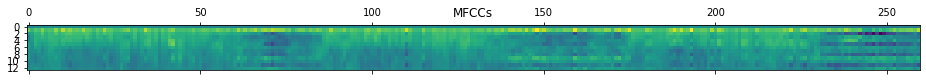

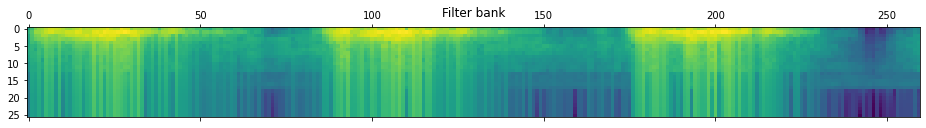

In [ ]:
from python_speech_features import logfbank

mfccs = mfccs.T
plt.matshow(mfccs)
plt.title('MFCCs')

filterbank_features = logfbank(sinyalAS, srAS)

print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])

filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()

In [ ]:
# Get more components
mfccs1 = librosa.feature.mfcc(sinyalAS, sr=srAS, n_mfcc=39)
mfccs2 = librosa.feature.mfcc(sinyalMR, sr=8000, n_mfcc=26, n_fft=2048, hop_length=512, n_mels=128)
mfccs3 = librosa.feature.mfcc(sinyalMS, sr=8000, n_mfcc=26, n_fft=2048, hop_length=512, n_mels=128)
mfccs4 = librosa.feature.mfcc(sinyalMVP, sr=8000, n_mfcc=26, n_fft=2048, hop_length=512, n_mels=128)
mfccs5 = librosa.feature.mfcc(sinyalN, sr=8000, n_mfcc=26, n_fft=2048, hop_length=512, n_mels=128)
print (mfccs1)

[[-434.26074    -406.70172    -384.68875    ... -484.89783
  -482.1582     -473.80167   ]
 [  67.09292     103.334595    131.33531    ...    0.99816513
     4.6436005    15.81496   ]
 [  52.865448     82.20219     102.31946    ...    0.9529357
     3.9521952    13.354191  ]
 ...
 [  -1.3886275    -1.7476869    -1.7572839  ...    0.9164287
     1.7098916     2.1660502 ]
 [  -3.236342     -2.871469     -3.5068026  ...    0.9045974
     1.359187      1.6666353 ]
 [  -4.500184     -4.219882     -5.413933   ...    0.8657078
     0.8172616     0.7347108 ]]


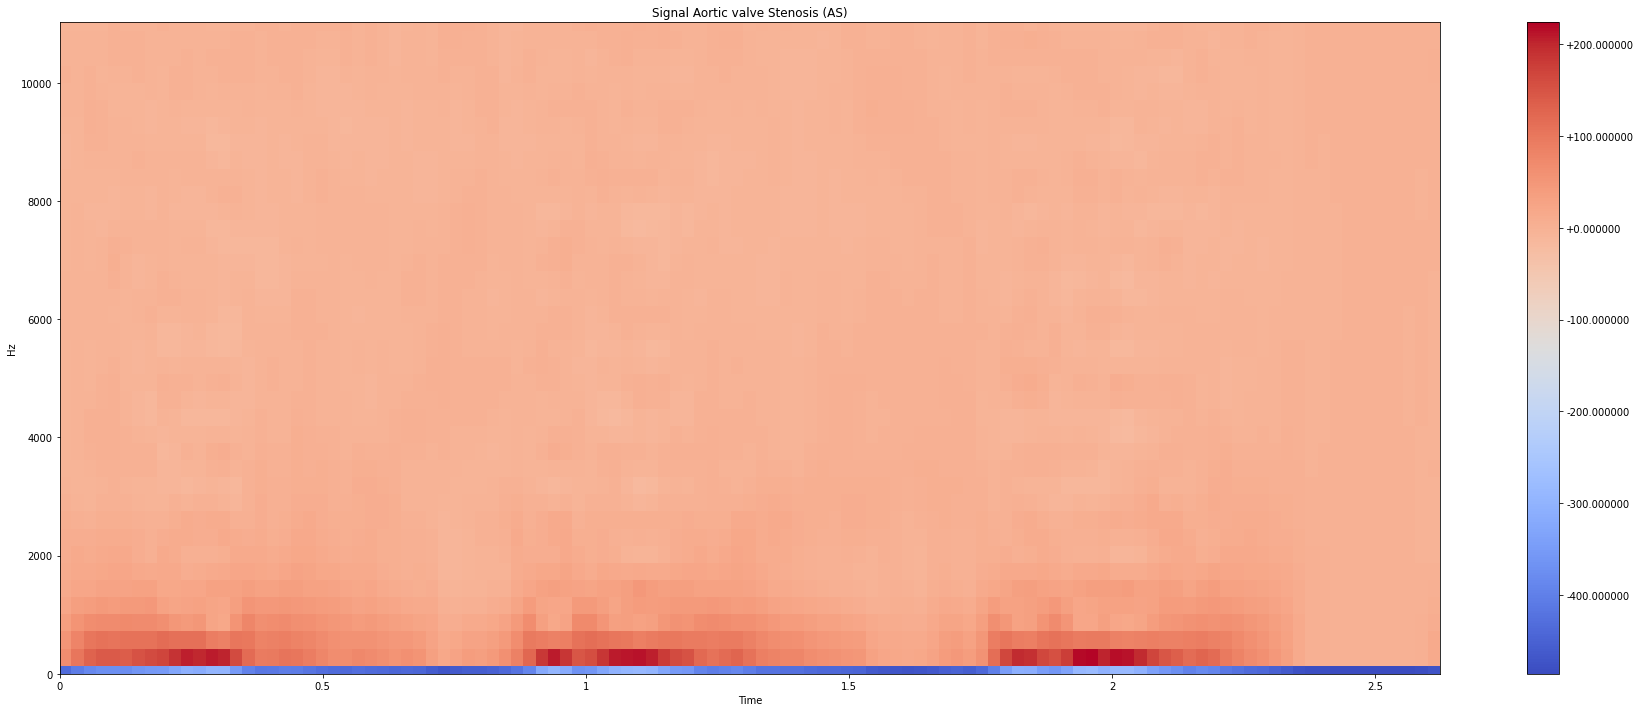

In [ ]:
import librosa.display
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs1,
                         sr=srAS,
                         x_axis='time',
                         y_axis='hz')
plt.colorbar(format="%+2f")
plt.title("Signal Aortic valve Stenosis (AS)")
plt.tight_layout()

In [ ]:
delta_mfccs = librosa.feature.delta(mfccs1)
delta2_mfccs = librosa.feature.delta(mfccs1, order=2)

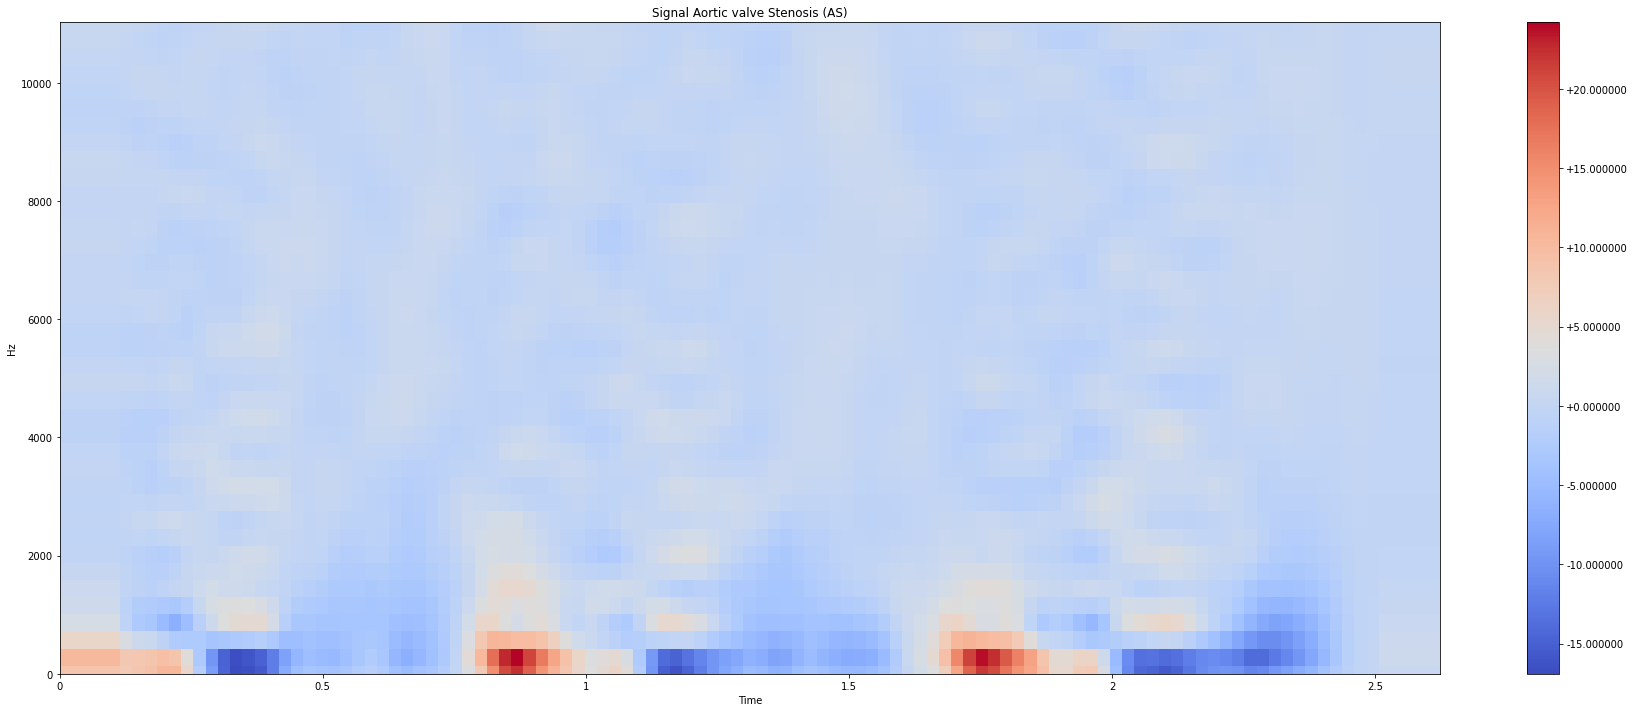

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs,
                         sr=srAS,
                         x_axis='time',
                         y_axis='hz')
plt.colorbar(format="%+2f")
plt.title("Signal Aortic valve Stenosis (AS)")
plt.tight_layout()

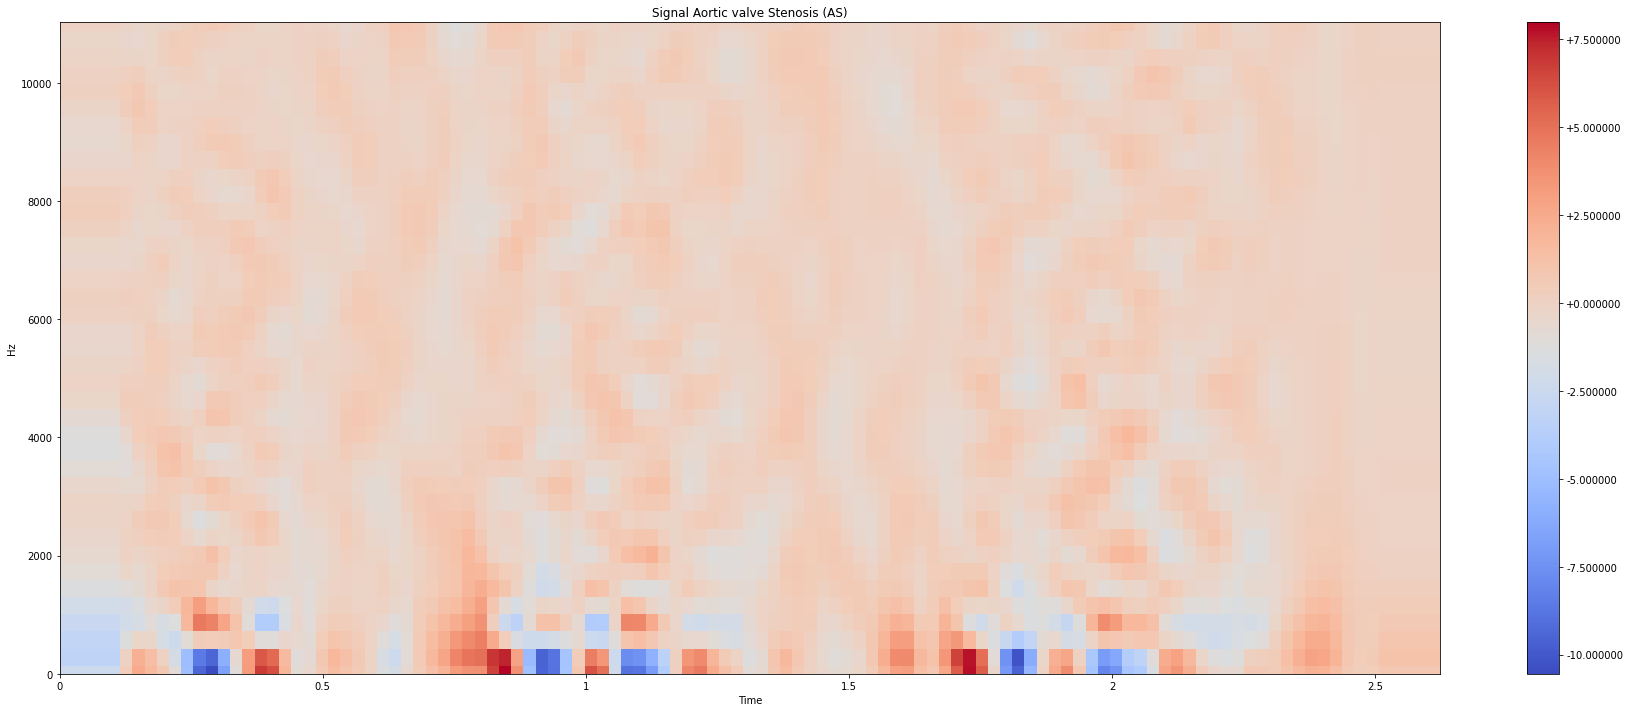

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs,
                         sr=srAS,
                         x_axis='time',
                         y_axis='hz')
plt.colorbar(format="%+2f")
plt.title("Signal Aortic valve Stenosis (AS)")
plt.tight_layout()

In [ ]:
comprehensive_mfccs = np.concatenate((mfccs1, delta_mfccs, delta2_mfccs))

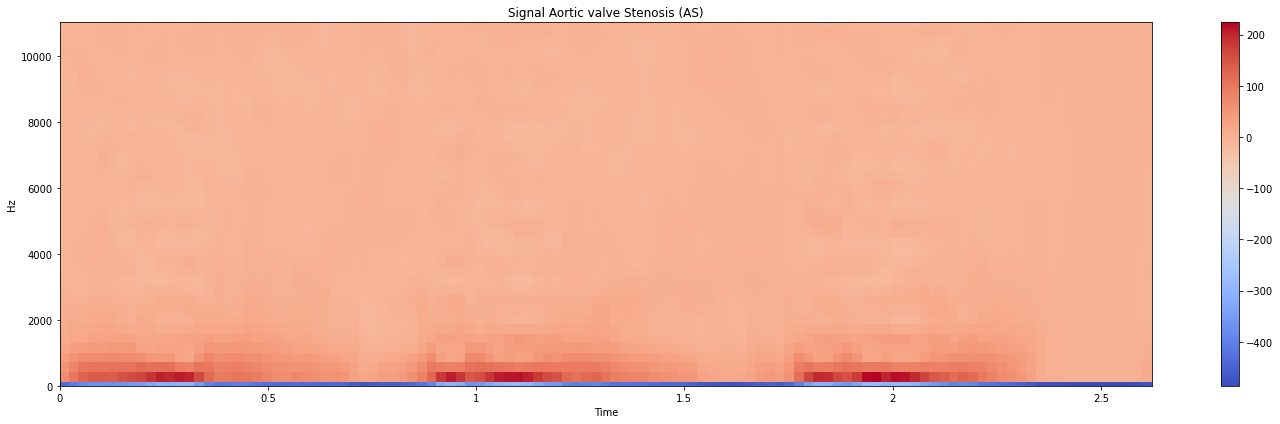

In [ ]:
plt.figure(figsize=(20, 6))
librosa.display.specshow(mfccs1,
                         sr=srAS,
                         x_axis='time',
                         y_axis='hz')
plt.colorbar()
plt.title("Signal Aortic valve Stenosis (AS)")
plt.tight_layout()
plt.savefig('MFCCs_AS.png')

Buat Dataset ekstraksi fitur

In [ ]:
header = 'filename' 
for i in range(1, 40):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file = open('MFCCs.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'AS MR MS MVP N'.split()
for g in genres:
    for filename in os.listdir(f'/content/gdrive/My Drive/sinyal3/{g}'):
        signal = f'/content/gdrive/My Drive/sinyal3/{g}/{filename}'
        # use kaiser_fast technique for faster extraction
        y, sr = librosa.load(signal, mono=True, duration=3, res_type='kaiser_fast')
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=39)
        to_append = f'{filename}'  
        for e in mfcc:
            to_append += f' {np.mean(e.T,axis=0)}'
        to_append += f' {g}'
        file = open('MFCCs.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

New Section

In [ ]:
data1_1 = pd.read_csv('MFCCs.csv')
data1_1.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29,mfcc30,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,label
0,New_AS_019.wav,-408.199463,108.693329,66.010132,36.814259,27.551611,21.399467,11.284242,5.456727,6.637220,6.659049,2.000329,-1.317850,-0.300773,0.227564,-2.144926,-3.257847,-1.257708,-0.187348,-2.007010,-3.386442,-2.671402,-2.518635,-3.941102,-4.513446,-3.661229,-3.724493,-5.007153,-5.094913,-3.647751,-3.113459,-4.119761,-4.455429,-3.300090,-2.509027,-2.896121,-2.931610,-2.010350,-1.597472,-2.274990,AS
1,New_AS_012.wav,-402.907471,105.200851,64.808014,36.632317,27.551531,22.176857,12.967642,6.818097,6.725326,6.038620,1.785296,-0.846643,0.398718,0.787782,-1.897804,-3.530992,-1.927256,-0.625538,-1.841062,-2.925998,-2.272323,-2.264474,-4.030215,-5.010062,-3.949449,-3.196094,-4.074843,-4.651443,-3.827086,-3.299937,-3.888664,-3.945032,-2.833223,-2.276914,-2.978786,-3.282526,-2.356179,-1.637907,-2.022694,AS
2,New_AS_017.wav,-400.250458,106.139961,66.186516,37.998375,27.884878,21.274035,11.961509,6.675927,7.217396,6.642431,2.444823,-0.301474,0.318765,0.119635,-2.303644,-3.153952,-1.299856,-0.448023,-2.072645,-3.216447,-2.530094,-2.330977,-3.598201,-4.320426,-3.787320,-3.784015,-4.672847,-4.585380,-3.280690,-2.825525,-3.705111,-3.972817,-2.994630,-2.527876,-3.228772,-3.387804,-2.203602,-1.284070,-1.688242,AS
3,New_AS_016.wav,-397.024628,109.818665,67.796227,38.931812,29.672338,23.466425,13.171189,6.796102,7.219104,6.922193,2.737959,0.024755,0.862393,0.588155,-2.329691,-3.476345,-1.392999,-0.355356,-2.298799,-3.756372,-2.870697,-2.499688,-4.203357,-5.365290,-4.492387,-3.846003,-4.725413,-5.132377,-4.020629,-3.300955,-3.930188,-4.170196,-3.167670,-2.459863,-2.766725,-2.772867,-2.003383,-1.731805,-2.330357,AS
4,New_AS_018.wav,-402.779755,105.839119,65.926910,37.713520,27.622786,21.090820,11.727324,6.303440,6.962652,6.792815,2.832304,-0.054726,0.417546,0.302270,-2.127299,-3.317739,-1.797795,-0.856836,-2.081034,-2.941357,-2.254757,-2.147919,-3.442257,-4.188581,-3.693981,-3.618819,-4.394650,-4.429911,-3.448359,-3.131867,-3.881751,-4.083735,-3.185630,-2.628554,-3.028286,-3.104229,-2.244873,-1.635218,-1.912504,AS


prepare data untuk seleksi fitur

In [ ]:
print('MFCCs :',data1_1.shape)

MFCCs : (1000, 41)


In [ ]:
data1_1 = data1_1.drop(['filename'], axis=1)
data1_1.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29,mfcc30,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,label
0,-408.199463,108.693329,66.010132,36.814259,27.551611,21.399467,11.284242,5.456727,6.637220,6.659049,2.000329,-1.317850,-0.300773,0.227564,-2.144926,-3.257847,-1.257708,-0.187348,-2.007010,-3.386442,-2.671402,-2.518635,-3.941102,-4.513446,-3.661229,-3.724493,-5.007153,-5.094913,-3.647751,-3.113459,-4.119761,-4.455429,-3.300090,-2.509027,-2.896121,-2.931610,-2.010350,-1.597472,-2.274990,AS
1,-402.907471,105.200851,64.808014,36.632317,27.551531,22.176857,12.967642,6.818097,6.725326,6.038620,1.785296,-0.846643,0.398718,0.787782,-1.897804,-3.530992,-1.927256,-0.625538,-1.841062,-2.925998,-2.272323,-2.264474,-4.030215,-5.010062,-3.949449,-3.196094,-4.074843,-4.651443,-3.827086,-3.299937,-3.888664,-3.945032,-2.833223,-2.276914,-2.978786,-3.282526,-2.356179,-1.637907,-2.022694,AS
2,-400.250458,106.139961,66.186516,37.998375,27.884878,21.274035,11.961509,6.675927,7.217396,6.642431,2.444823,-0.301474,0.318765,0.119635,-2.303644,-3.153952,-1.299856,-0.448023,-2.072645,-3.216447,-2.530094,-2.330977,-3.598201,-4.320426,-3.787320,-3.784015,-4.672847,-4.585380,-3.280690,-2.825525,-3.705111,-3.972817,-2.994630,-2.527876,-3.228772,-3.387804,-2.203602,-1.284070,-1.688242,AS
3,-397.024628,109.818665,67.796227,38.931812,29.672338,23.466425,13.171189,6.796102,7.219104,6.922193,2.737959,0.024755,0.862393,0.588155,-2.329691,-3.476345,-1.392999,-0.355356,-2.298799,-3.756372,-2.870697,-2.499688,-4.203357,-5.365290,-4.492387,-3.846003,-4.725413,-5.132377,-4.020629,-3.300955,-3.930188,-4.170196,-3.167670,-2.459863,-2.766725,-2.772867,-2.003383,-1.731805,-2.330357,AS
4,-402.779755,105.839119,65.926910,37.713520,27.622786,21.090820,11.727324,6.303440,6.962652,6.792815,2.832304,-0.054726,0.417546,0.302270,-2.127299,-3.317739,-1.797795,-0.856836,-2.081034,-2.941357,-2.254757,-2.147919,-3.442257,-4.188581,-3.693981,-3.618819,-4.394650,-4.429911,-3.448359,-3.131867,-3.881751,-4.083735,-3.185630,-2.628554,-3.028286,-3.104229,-2.244873,-1.635218,-1.912504,AS


In [ ]:
data1_1.dtypes

mfcc1     float64
mfcc2     float64
mfcc3     float64
mfcc4     float64
mfcc5     float64
mfcc6     float64
mfcc7     float64
mfcc8     float64
mfcc9     float64
mfcc10    float64
mfcc11    float64
mfcc12    float64
mfcc13    float64
mfcc14    float64
mfcc15    float64
mfcc16    float64
mfcc17    float64
mfcc18    float64
mfcc19    float64
mfcc20    float64
mfcc21    float64
mfcc22    float64
mfcc23    float64
mfcc24    float64
mfcc25    float64
mfcc26    float64
mfcc27    float64
mfcc28    float64
mfcc29    float64
mfcc30    float64
mfcc31    float64
mfcc32    float64
mfcc33    float64
mfcc34    float64
mfcc35    float64
mfcc36    float64
mfcc37    float64
mfcc38    float64
mfcc39    float64
label      object
dtype: object

In [ ]:
data1_1['label'] = pd.Categorical(data1_1['label'])

In [ ]:
y1 = LabelEncoder().fit_transform(data1_1.iloc[:, -1])

In [ ]:
X1 = StandardScaler().fit_transform(np.array(data1_1.iloc[:, :-1], dtype = float))

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=127)

In [ ]:
X1_train.shape, X1_test.shape

((800, 39), (200, 39))

fitur seleksi

In [ ]:
#normalization
x_train_N = (X1_train-X1_train.mean())/(X1_train.max()-X1_train.min())
x_test_N = (X1_test-X1_test.mean())/(X1_test.max()-X1_test.min())

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred == 1) & (actual_pos)
    false_pos = (y_pred == 1) & (actual_neg)
    true_neg = (y_pred == 0) & (actual_neg)
    false_neg = (y_pred == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

In [ ]:
# Using PCA from sklearn PCA
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
# initialize model
pca = PCA(n_components=0.99)
# fit to training data
pca.fit(X1_train)
# transform
X_pca = pca.transform(X1_train)

In [ ]:
pca = PCA(n_components=39)
# fit to training data
pca.fit(X1_train)
# transform
X_train_pca = pca.transform(X1_train)

X_test_pca = pca.transform(X1_test)

In [ ]:
X1_train.shape
X1_test.shape

(200, 39)

In [ ]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X1_train)
X_test = pca.transform(X1_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC(loss='hinge', dual=True)
model.fit(X1_train, y1_train)
print_score(model, X1_train, y1_train, X1_test, y1_test, train=True)
print_score(model, X1_train, y1_train, X1_test, y1_test, train=False)

Train Result:n================================================
Accuracy Score: 90.62%
_______________________________________________
CLASSIFICATION REPORT:n                    0           1  ...   macro avg  weighted avg
precision    0.894410    0.907895  ...    0.905581      0.905388
recall       0.872727    0.896104  ...    0.906750      0.906250
f1-score     0.883436    0.901961  ...    0.905721      0.905370
support    165.000000  154.000000  ...  800.000000    800.000000

[4 rows x 8 columns]
_______________________________________________
Confusion Matrix: n [[144   0   5  16   0]
 [  6 138   7   0   3]
 [  4   0 149   3   1]
 [  6  14   2 134   7]
 [  1   0   0   0 160]]n
Test Result:n================================================
Accuracy Score: 90.00%
_______________________________________________
CLASSIFICATION REPORT:n                   0          1          2  ...  accuracy   macro avg  weighted avg
precision   0.780488   0.891304   0.975610  ...       0.9    0.900369  

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y1_train)
print_score(svm_clf, X_train, y1_train, X_test, y1_test, train=True)
print_score(svm_clf, X_train, y1_train, X_test, y1_test, train=False)

TypeError: ignored

klasifikasi

In [ ]:
X1_train.shape
X1_test.shape

(200, 39)

In [ ]:
pca = PCA(n_components=39)
X_train = pca.fit_transform(X1_train)
X_test = pca.transform(X1_test)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 10, scoring='accuracy')
  
# fitting the model for grid search
grid.fit(X_train, y1_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.381 total time=   0.1s
[CV 2/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.338 total time=   0.1s
[CV 3/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.381 total time=   0.1s
[CV 4/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.356 total time=   0.1s
[CV 5/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.319 total time=   0.1s
[CV 1/5; 2/50] START C=0.1, gamma=1, kernel=linear..............................
[CV 1/5; 2/50] END C=0.1, gamma=1, kernel=linea

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=10)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [ ]:
Dataframe = pd.DataFrame(grid.cv_results_)
Dataframe = Dataframe.drop(['std_test_score','split4_test_score','split3_test_score','split2_test_score','split1_test_score','split0_test_score','params','std_score_time','mean_score_time','std_fit_time','mean_fit_time'],axis=1)
Dataframe.sort_values('rank_test_score', ascending="True")
csvpak = Dataframe.sort_values('rank_test_score', ascending="True")
csvpak.to_csv('datatuning.csv')

In [ ]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y1_test, grid_predictions))  
# print classification report
print(classification_report(y1_test, grid_predictions, target_names=['Sinyal AS', 'Sinyal MR','Sinyal MS','Sinyal MVP','Sinyal N']))
print("Accuracy : ",accuracy_score(y1_test, grid_predictions))

[[35  0  0  0  0]
 [ 0 46  0  0  0]
 [ 0  0 43  0  0]
 [ 1  0  0 36  0]
 [ 0  0  0  0 39]]
              precision    recall  f1-score   support

   Sinyal AS       0.97      1.00      0.99        35
   Sinyal MR       1.00      1.00      1.00        46
   Sinyal MS       1.00      1.00      1.00        43
  Sinyal MVP       1.00      0.97      0.99        37
    Sinyal N       1.00      1.00      1.00        39

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200

Accuracy :  0.995


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y1_test, grid_predictions)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.995


In [ ]:
#no pca
from sklearn import svm
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 10, scoring='accuracy')
  
# fitting the model for grid search
grid.fit(X1_train, y1_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.381 total time=   0.1s
[CV 2/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.338 total time=   0.1s
[CV 3/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.381 total time=   0.1s
[CV 4/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.356 total time=   0.1s
[CV 5/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.319 total time=   0.1s
[CV 1/5; 2/50] START C=0.1, gamma=1, kernel=linear..............................
[CV 1/5; 2/50] END C=0.1, gamma=1, kernel=linea

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=10)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [ ]:
Dataframe = pd.DataFrame(grid.cv_results_)
Dataframe = Dataframe.drop(['std_test_score','split4_test_score','split3_test_score','split2_test_score','split1_test_score','split0_test_score','params','std_score_time','mean_score_time','std_fit_time','mean_fit_time'],axis=1)
Dataframe.sort_values('rank_test_score', ascending="True")
csvpak = Dataframe.sort_values('rank_test_score', ascending="True")
csvpak.to_csv('datatuning.csv')

In [ ]:
grid_predictions = grid.predict(X1_test)

print(confusion_matrix(y1_test, grid_predictions))  
# print classification report
print(classification_report(y1_test, grid_predictions, target_names=['Sinyal AS', 'Sinyal MR','Sinyal MS','Sinyal MVP','Sinyal N']))
print("Accuracy : ",accuracy_score(y1_test, grid_predictions))

[[35  0  0  0  0]
 [ 0 46  0  0  0]
 [ 0  0 43  0  0]
 [ 1  0  0 36  0]
 [ 0  0  0  0 39]]
              precision    recall  f1-score   support

   Sinyal AS       0.97      1.00      0.99        35
   Sinyal MR       1.00      1.00      1.00        46
   Sinyal MS       1.00      1.00      1.00        43
  Sinyal MVP       1.00      0.97      0.99        37
    Sinyal N       1.00      1.00      1.00        39

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200

Accuracy :  0.995


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y1_test, grid_predictions)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.995
